## Machine Learning - Ex.4


Submitted by: [**enter your name/s**]

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. Non-linear Logistic regression (2-D)
Lets generate some 2-D training data:

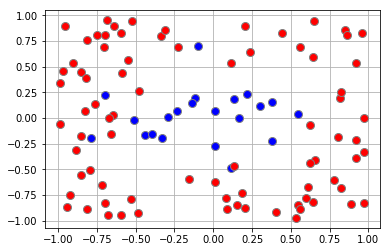

In [4]:
def generate_data_2D (N=100):
    x = np.random.random((N,2))*2-1
    X = np.concatenate((np.ones((N,1)),x,x**2,(x[:,0]*x[:,1])[:,None]),axis=1);
    w = np.array([-0.3,0,0,1,1,0])*10
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y


x,y = generate_data_2D(N=100)

plt.plot(x[y==0,0],x[y==0,1],'ob',markeredgecolor='gray',markersize=8)
plt.plot(x[y==1,0],x[y==1,1],'or',markeredgecolor='gray',markersize=8)
plt.grid()
plt.show()


Use the same algoirthm from Ex.3, to fit the following 2-D **non-linear** logistic model:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2)$$

where $g(\cdot)$ is the sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

hint: map the 2-D input samples to a higher dimension..


Plot the results as you did in Ex.3:
- Use `meshgrid` and `contour` to plot the 2-D function $g(\vec{w}\cdot\vec{x})$. Use the blue-white-red colormap: cmap=plt.cm.bwr
- Plot the data points (in blue and red) on top of the previous plot
- Add a black contour line that represents the **non-linear** decision boundary: $g(\vec{w}\cdot\vec{x})=0.5$ 





In [5]:
def gradient_descent (X, y, alpha=0.1, T=100):
    J = np.zeros(T) 
    N,d = X.shape
    w = np.zeros(d)  
    for t in range(T):
        z=X.dot(w)
        h=1/(1+np.exp(-z)) # logistic regression
        w = w - alpha*((1/N)*X.T.dot(h-y))
        J[t] = -1*(1/N)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
        
    return w, J 

array([ 1.13008828, -0.02685323, -0.10606722])

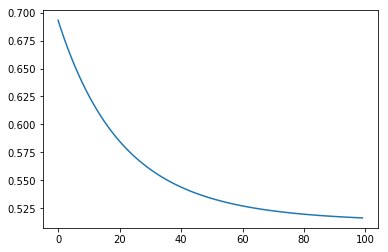

In [6]:
# your code here..   

# your code here.. 
X=np.hstack((np.ones(x.shape[0])[:, np.newaxis], x))
w, J=gradient_descent (X, y, alpha=0.1, T=100)
plt.plot(J)
w

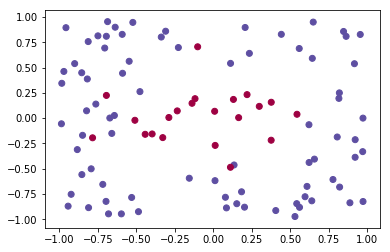

In [18]:
# Set min and max values and give it some padding
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
z=w[0]+(w[1:].dot(np.c_[xx.ravel(), yy.ravel()].T))
# Z = z#model(z)
Z = h=1/(1+np.exp(-z))
# Z[Z>0.5]=1
# Z[Z<0.5]=0
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
# plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

### 2. Polynomial regression - overfitting

First, lets generate some polynomial training data and divide it (50%/50% split) into training set (red) and testing set:

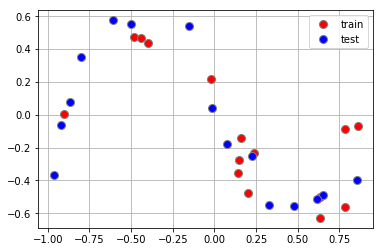

In [37]:
def generate_data (N=30):
    x = np.random.rand(N)*2-1 
    y = (x-0.9)*2*x*(x+0.9) # 3rd degree polynom
    y += np.random.randn(N)*0.1 # add gaussian noise (with sigma = 4)
    return x,y


x,y = generate_data()

x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.grid()
plt.show()


- Fit polynomial models of different degrees (from d=1, d=2, and up to d=9) to the data (use **only** the training data when fitting the models).

- For each polymonial model,  plot the resulting curve (together with train/test points) and calculate training/test errors. use subplots. 

- Finally, plot the training errors and the test errors as a function of the polynomial degree. Use log-scale if necessary: `plt.yscale('log')`


In [ ]:
# your code here..



### 3. Polynomial regression - regularization

In this section we will use the same data from the previous section to learn a 9-th degree polynomial model. To avoid overfitting we will use regularization:

$$ J(\vec{w}) = \frac{1}{n} \sum_{i=1}^n{(\hat{y_i}-y_i)^2} + \lambda \vec{w}\cdot\vec{w}$$

Try different values of $\lambda$ (use: `np.logspace`): 
$$\lambda=10^{-7},10^{-6},...,10^{+1}$$

- For each model,  plot the resulting curve (together with train/test points) and calculate training/test errors. use subplots. 

- Finally, plot the training errors and the test errors as a function of $\lambda$. Use log-scales on both axis if necessary.

In [ ]:
# your code here..



## Good luck !